# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Install Citypy 
%pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
      --------------------------------------- 10.2/675.6 kB ? eta -:--:--
     - ----------------------------------- 30.7/675.6 kB 435.7 kB/s eta 0:00:02
     --- --------------------------------- 61.4/675.6 kB 544.7 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/675.6 kB 655.4 kB/s eta 0:00:01
     -------- --------------------------- 153.6/675.6 kB 833.5 kB/s eta 0:00:01
     ---------- ------------------------- 204.8/675.6 kB 958.4 kB/s eta 0:00:01
     ------------ ----------------------- 235.5/675.6 kB 901.1 kB/s eta 0:00:01
     -------------- --------------------- 276.5/675.6 kB 947.5 kB/s eta 0:00:01
     ---------------- ------------------- 317.4/675.6 kB 936.6 kB/s eta 0:00:01
     ------------------ ----------------- 337.9/675.6 kB 952.6 kB/s eta 0:00:01
     ------------------- ---------------- 358.4/675.6 kB 928.4 kB/s eta 0:00:01
     ------------------- ---------------- 358.4/675.6

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-270
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        t = time.localtime(city_weather['dt'])
        t.tm_year
        t.tm_mon
        t.tm_yday
        # date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'
        city_date = f'{t.tm_year}-{t.tm_mon}-{t.tm_yday}'

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al qusayr
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | uliastay
Processing Record 4 of Set 1 | colonia
Processing Record 5 of Set 1 | essaouira
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | alegrete
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | nova vicosa
Processing Record 14 of Set 1 | port saint john's
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | abu dhabi
Processing Record 17 of Set 1 | dingcheng
Processing Record 18 of Set 1 | graaff-reinet
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | uturoa
Processing Record 22 of Set 1 | hamina
Processing Recor

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al qusayr,34.5091,36.5798,18.10,82,0,0.43,SY,2024-4-102
1,waitangi,-43.9535,-176.5597,19.16,96,100,3.58,NZ,2024-4-102
2,uliastay,47.7417,96.8444,6.08,54,100,2.87,MN,2024-4-102
3,colonia,50.9333,6.9500,18.51,79,75,1.54,DE,2024-4-102
4,essaouira,31.5125,-9.7700,21.88,79,8,6.30,MA,2024-4-102


In [27]:
import os
import pandas as pd

# Create the output directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to a CSV file in the output directory
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al qusayr,34.5091,36.5798,18.10,82,0,0.43,SY,2024-4-102
1,waitangi,-43.9535,-176.5597,19.16,96,100,3.58,NZ,2024-4-102
2,uliastay,47.7417,96.8444,6.08,54,100,2.87,MN,2024-4-102
3,colonia,50.9333,6.9500,18.51,79,75,1.54,DE,2024-4-102
4,essaouira,31.5125,-9.7700,21.88,79,8,6.30,MA,2024-4-102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

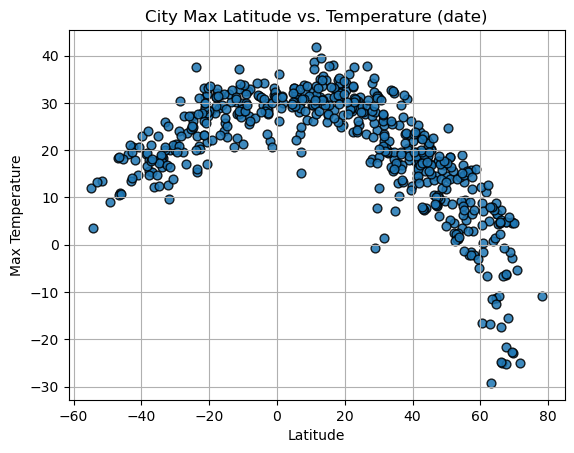

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=40, edgecolors='black', alpha=.86)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'City Max Latitude vs. Temperature (date)')
plt.grid(visible=True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

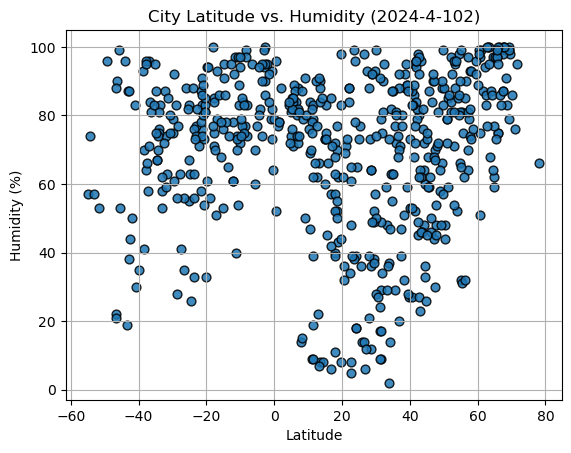

In [31]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Humidity', s=40, edgecolors='black', alpha=.86)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid(visible=True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

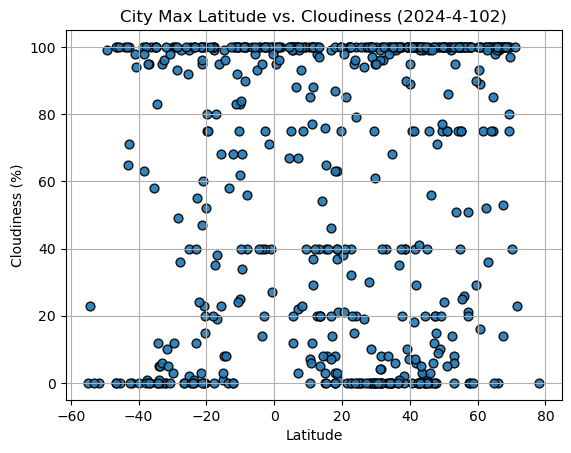

In [32]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=40, edgecolors='black', alpha=.90)
# plt.plot(marker='o',markerfacecolor='w', markeredgewidth=10.5, markeredgecolor=('black'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Max Latitude vs. Cloudiness ({date})')
plt.grid(visible=True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

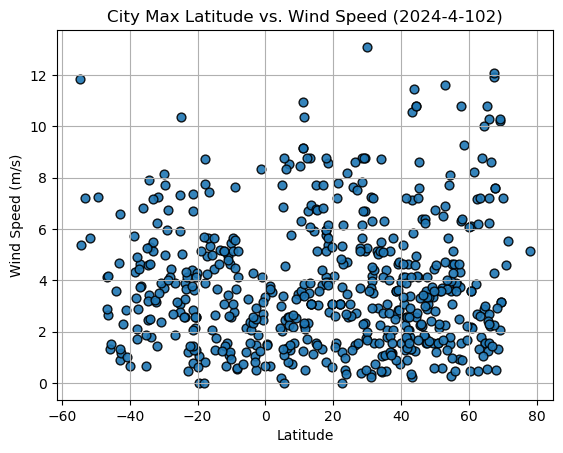

In [33]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=40, edgecolors='black', alpha=.90)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed ({date})')
plt.grid(visible=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = (x * slope) + intercept

def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = (x * slope) + intercept
    return regress_values, slope, intercept, rvalue

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al qusayr,34.5091,36.5798,18.10,82,0,0.43,SY,2024-4-102
2,uliastay,47.7417,96.8444,6.08,54,100,2.87,MN,2024-4-102
3,colonia,50.9333,6.9500,18.51,79,75,1.54,DE,2024-4-102
4,essaouira,31.5125,-9.7700,21.88,79,8,6.30,MA,2024-4-102
5,ilulissat,69.2167,-51.1000,-2.84,79,75,2.06,GL,2024-4-102


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,19.16,96,100,3.58,NZ,2024-4-102
6,alegrete,-29.7831,-55.7919,20.83,79,100,8.12,BR,2024-4-102
8,grytviken,-54.2811,-36.5092,3.57,74,23,5.36,GS,2024-4-102
11,port-aux-francais,-49.3500,70.2167,9.10,96,99,7.23,TF,2024-4-102
12,nova vicosa,-17.8919,-39.3719,31.19,71,0,3.91,BR,2024-4-102


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8373617129166099


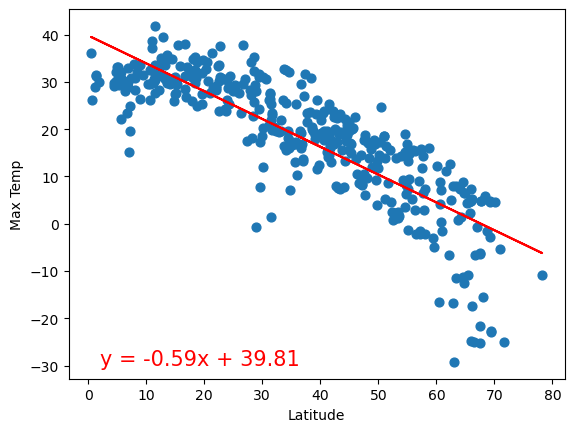

In [37]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(2, -30, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.plot(x,regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.775547595593502


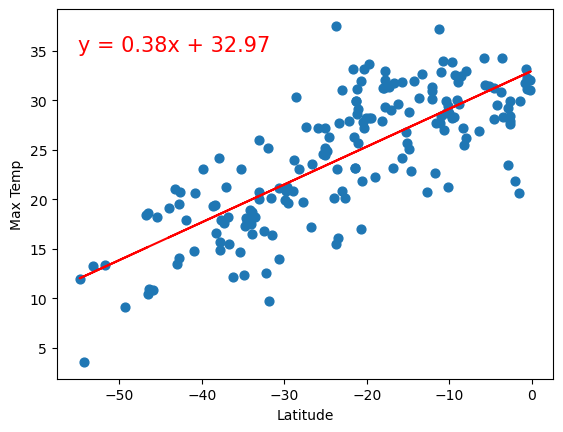

In [38]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')


slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-55, 35, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.28845269839552945


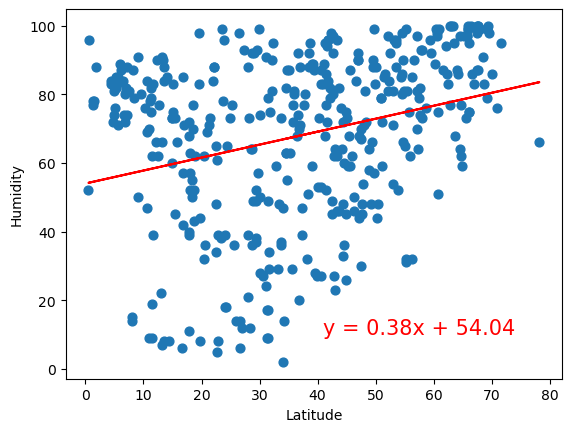

In [39]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(41, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.3347420023338559


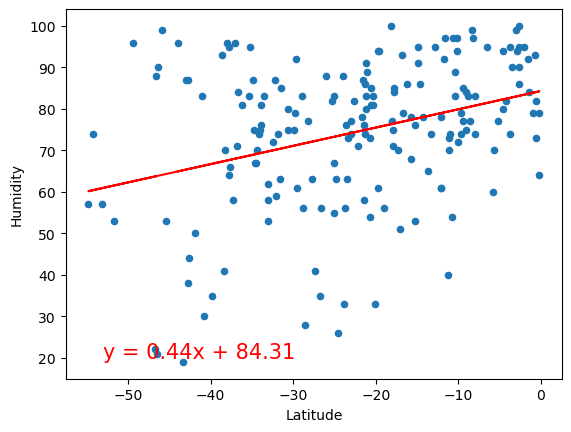

In [40]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter(x='Lat', y='Humidity')

x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-53, 20, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11534621562274361


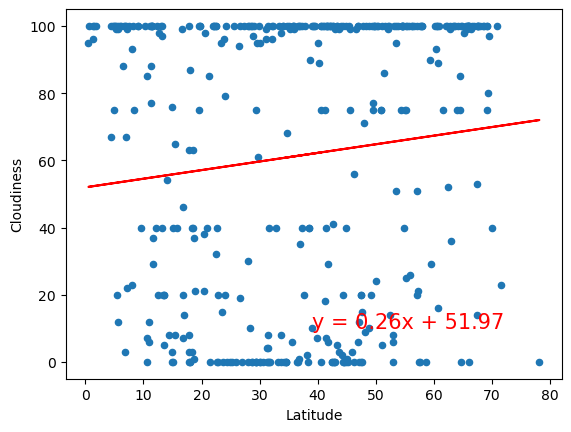

In [41]:
# Northern Hemisphere
# YOUR CODE HERE

northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')

x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(39, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.22362483805652392


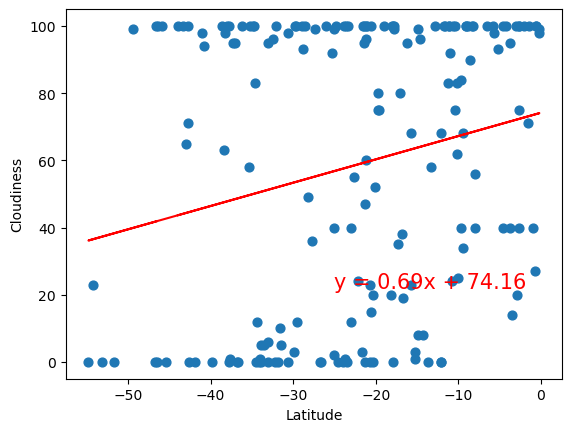

In [42]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-25, 22, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03822424896377254


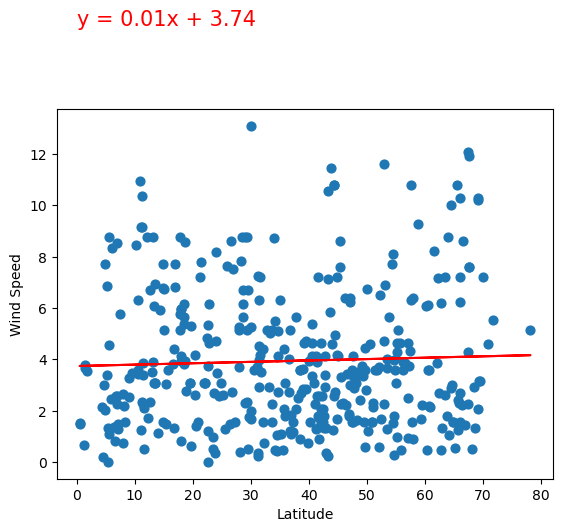

In [43]:
# Northern Hemisphere
# YOUR CODE HERE
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)

x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(0, 17, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.22208875426929003


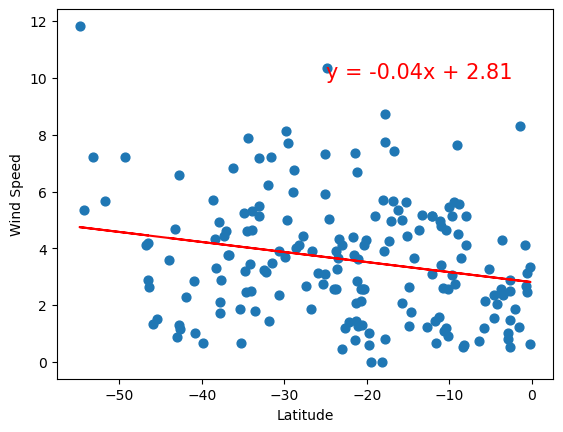

In [44]:
# Southern Hemisphere
# YOUR CODE HERE
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40)

x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
(regress_values, slope, intercept, rvalue) = lin_reg(x,y)
plt.plot(x,regress_values, 'r-')

slope = '%.2f'%slope
intercept = '%.2f'%intercept
plt.text(-25, 10, f'y = {slope}x + {intercept}', fontsize = 15, color='red')

print(f'The r-value is: {rvalue}')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE